In [3]:
import pandas as pd
import numpy as np

df = pd.read_excel('Gyalpozhing_household_power_consumption.XLSX')
# print(df.head())
# print('hello')
df = pd.DataFrame(df,columns=['Category','portion','posting_Date','current','voltage','consumption','energy_Charges'])
df = df.loc[(df['posting_Date'] >= '01-01-2019') & (df['posting_Date'] < '01-01-2022')]

df['Year'] = pd.to_datetime(df['posting_Date']).dt.year
df['Month'] = pd.to_datetime(df['posting_Date']).dt.month
df = df.drop(['posting_Date'], axis = 1)

df = df.drop_duplicates(keep='first')

from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp = imp.fit_transform(df)

df = pd.DataFrame(imp, columns=df.columns)
# print(df.head())


df = df[df['consumption'] >1.00]

petroldf = df[df['Year']==2021]
dieseldf = df[df['Year']==2019]

petrolg = petroldf[petroldf['portion']=='P17_41']
dieselg = dieseldf[dieseldf['portion']=='P17_41']



p = petrolg.sort_values(by='Month')
d = dieselg.sort_values(by='Month')

In [4]:
p.head()

,Category,portion,current,voltage,consumption,energy_Charges,Year,Month
11650,LV Agricultural,P17_41,0.062846,234.0,9.0,32.4,2021,1
11972,LV Urban Domestic Customers,P17_41,0.328194,234.0,47.0,60.16,2021,1
11971,LV Urban Domestic Customers,P17_41,1.075359,234.0,154.0,272.72,2021,1
11970,LV Urban Domestic Customers,P17_41,0.900788,234.0,129.0,205.72,2021,1
11969,LV Urban Domestic Customers,P17_41,1.54321,234.0,221.0,452.28,2021,1


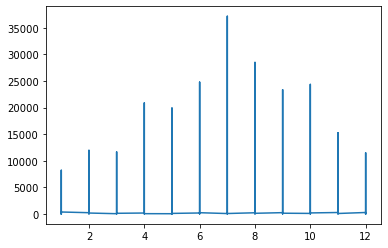

In [5]:
import matplotlib.pyplot as plt
plt.plot(p['Month'], p['consumption'])

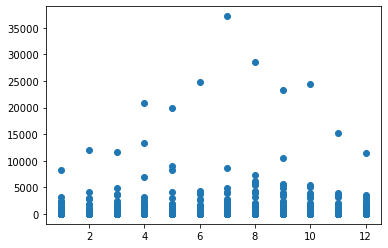

In [7]:
plt.scatter(p['Month'], p['consumption'])